In [1]:
!unzip '/content/Red wine.zip'

unzip:  cannot find or open /content/Red wine.zip, /content/Red wine.zip.zip or /content/Red wine.zip.ZIP.


In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus

In [3]:
url = "/content/winequality-red.csv"
data = pd.read_csv(url)

In [4]:

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

**Feature** **Selection**

In [6]:

features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [7]:


target = ['quality']

**Checking Null Values**

In [8]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

**Normalize Dataset**

In [9]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(data.iloc[:,0:-1])
normal_df = pd.DataFrame(normal_df, columns = data.iloc[:,0:-1].columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  


**Fixing Imbalanced Dataset**

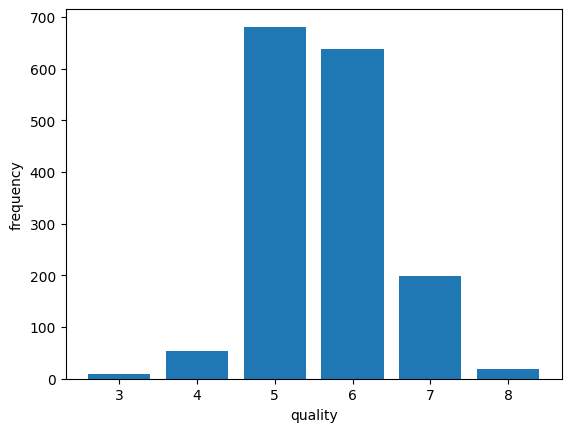

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [10]:
quality_dist = data['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)

In [11]:
data['quality'] = data['quality'].map({
        3 : 0,
        4 : 0,
        5 : 1,
        6 : 1,
        7 : 2,
        8 : 2
})

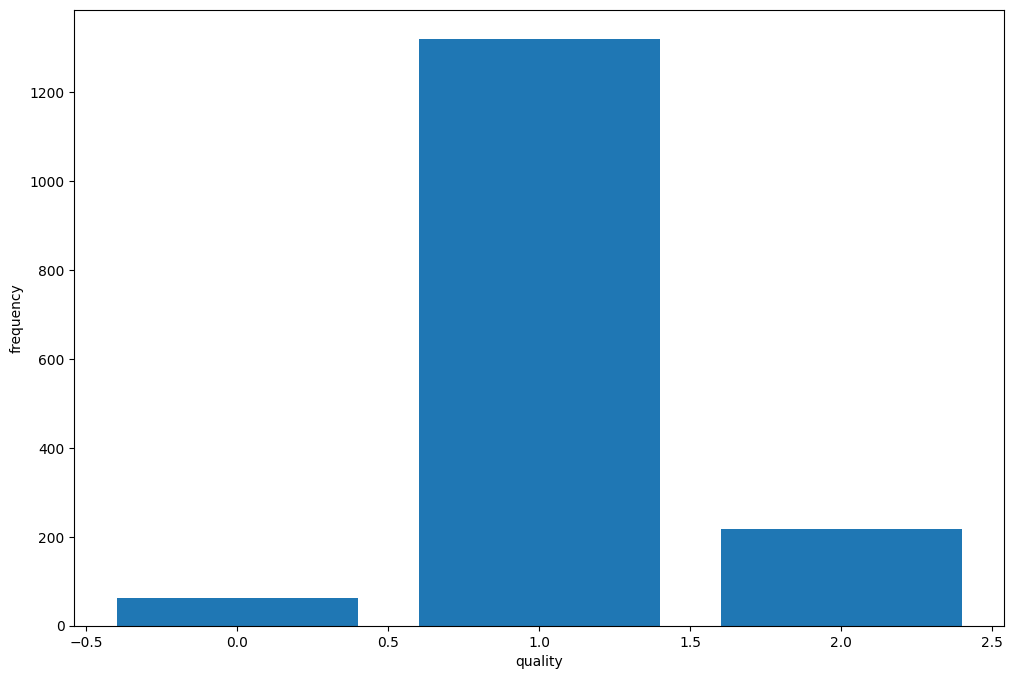

1    1319
2     217
0      63
Name: quality, dtype: int64


In [12]:
fig, ax = plt.subplots(figsize=(12,8))
quality_dist = data['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)

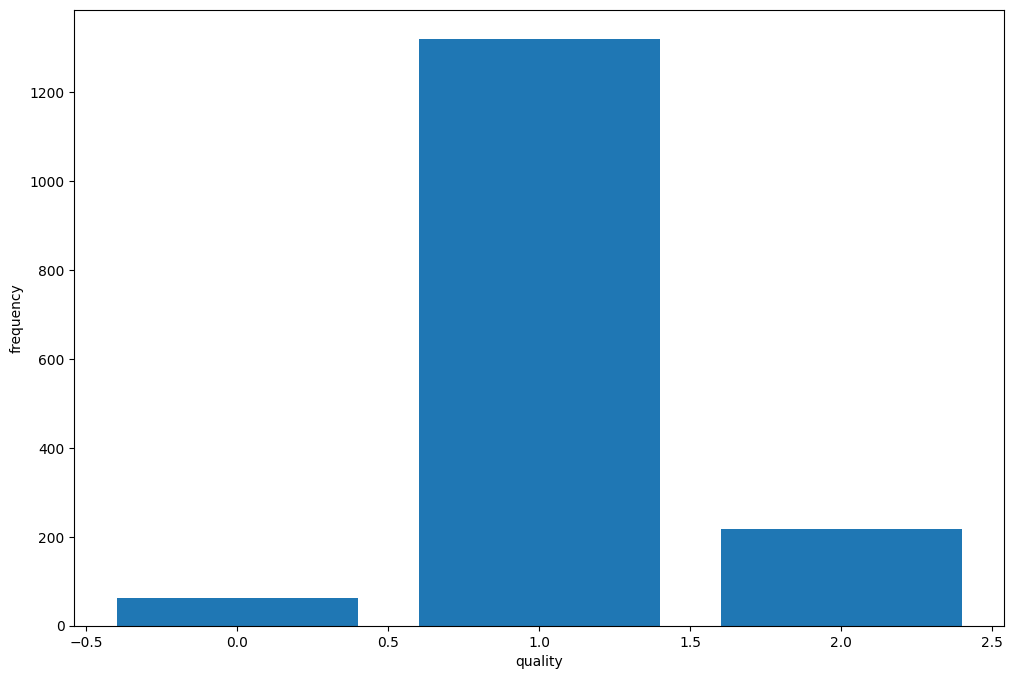

1    1319
2     217
0      63
Name: quality, dtype: int64


In [13]:
fig, ax = plt.subplots(figsize=(12,8))
quality_dist = data['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)

In [14]:
sme = SMOTETomek(random_state=42)
X_resampled, y_resampled = sme.fit_resample(normal_df, data['quality'])

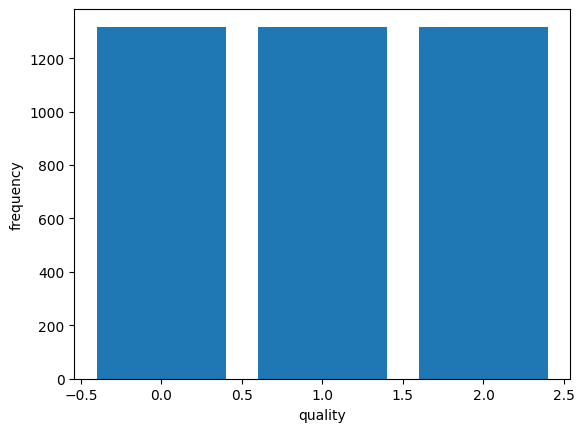

2    1318
0    1317
1    1316
Name: quality, dtype: int64


In [15]:

quality_dist = y_resampled.value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()
print(quality_dist)


In [16]:

class Percent(float):
    def __str__(self):
        return '{:.2%}'.format(self)


**Data Visualization**

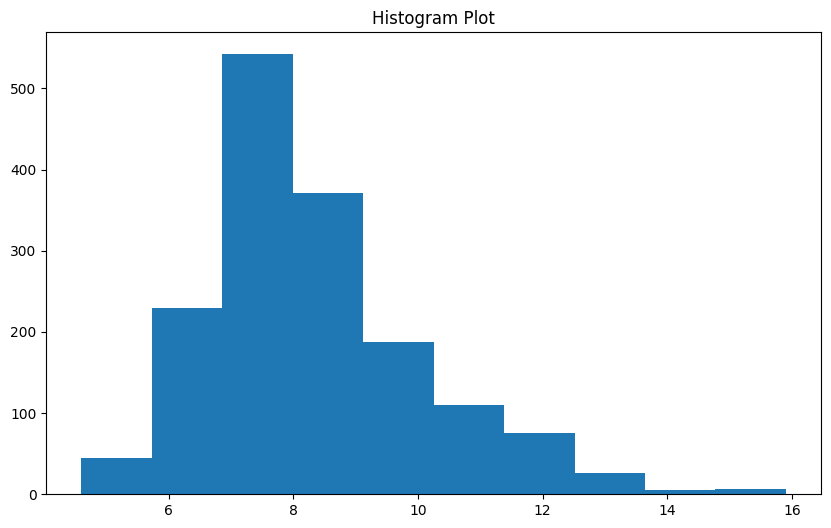

In [17]:
def hist_plots(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(data['fixed acidity'])

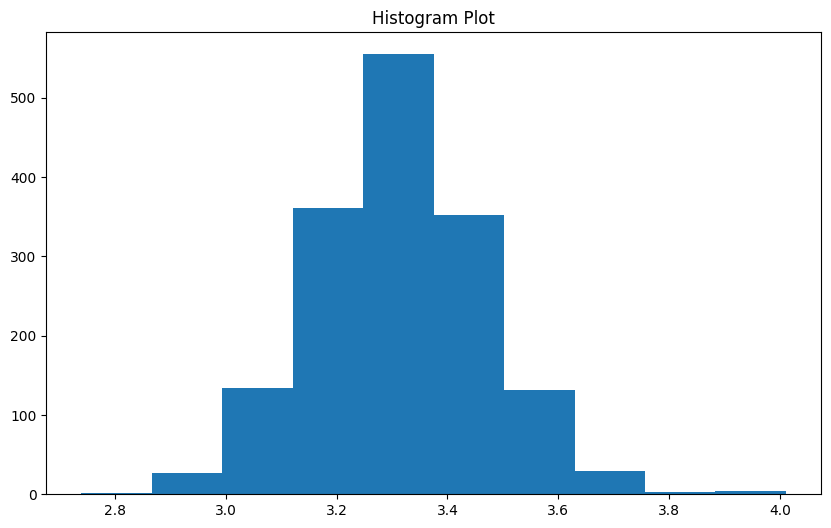

In [18]:

hist_plots(data['pH'])

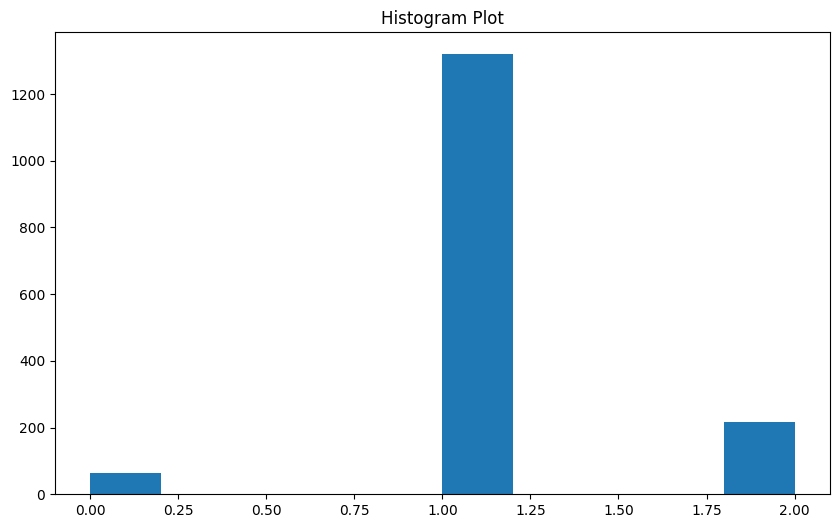

In [19]:

hist_plots(data['quality'])

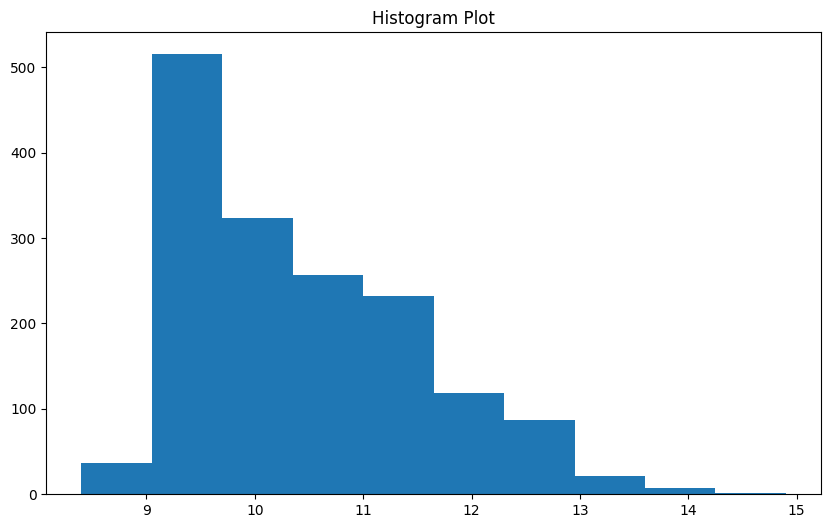

In [20]:
hist_plots(data['alcohol'])

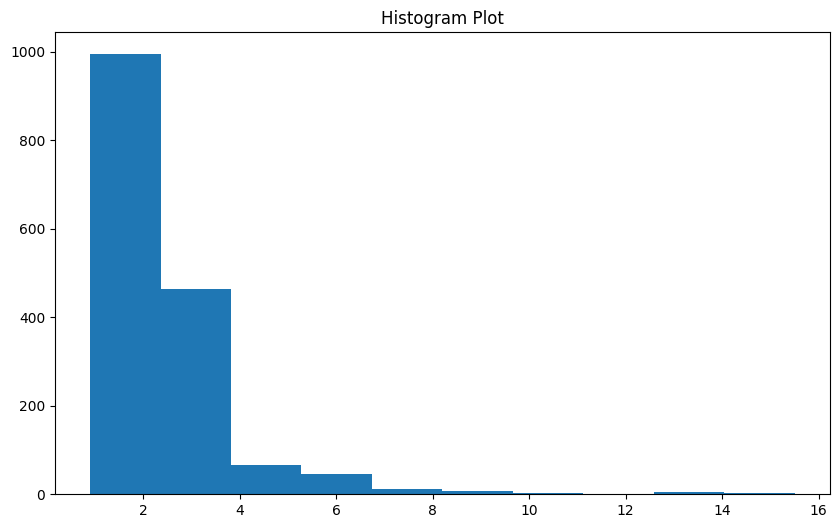

In [21]:

hist_plots(data['residual sugar'])

In [24]:
import seaborn as sns

<Axes: xlabel='volatile acidity', ylabel='Density'>

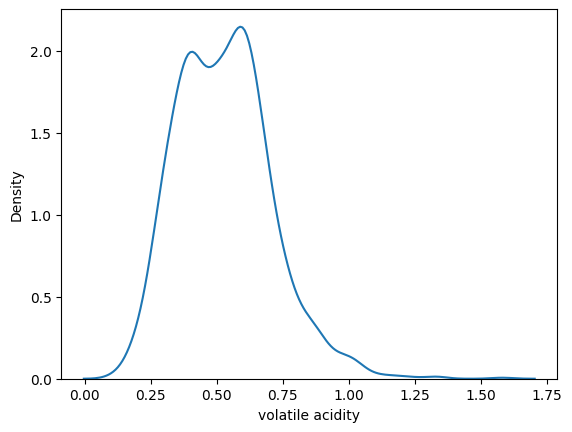

In [23]:
sns.kdeplot(data['volatile acidity'])

<Axes: xlabel='chlorides', ylabel='Density'>

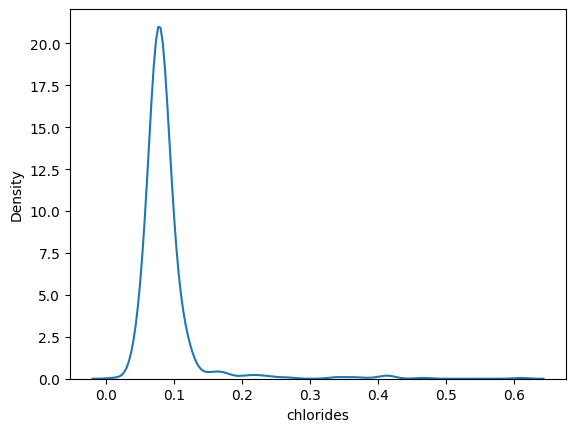

In [25]:
sns.kdeplot(data['chlorides'])

<Axes: xlabel='density', ylabel='Density'>

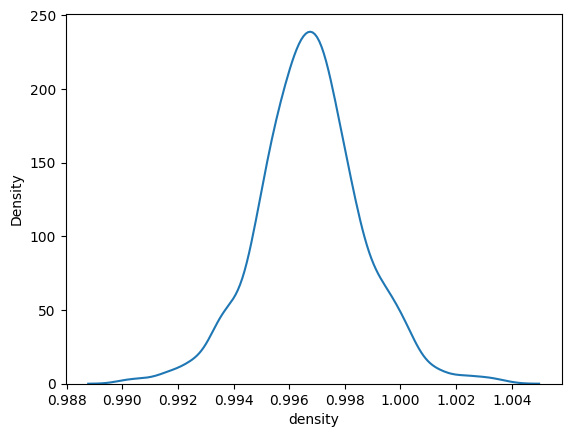

In [26]:

sns.kdeplot(data['density'])

<Figure size 1200x600 with 0 Axes>

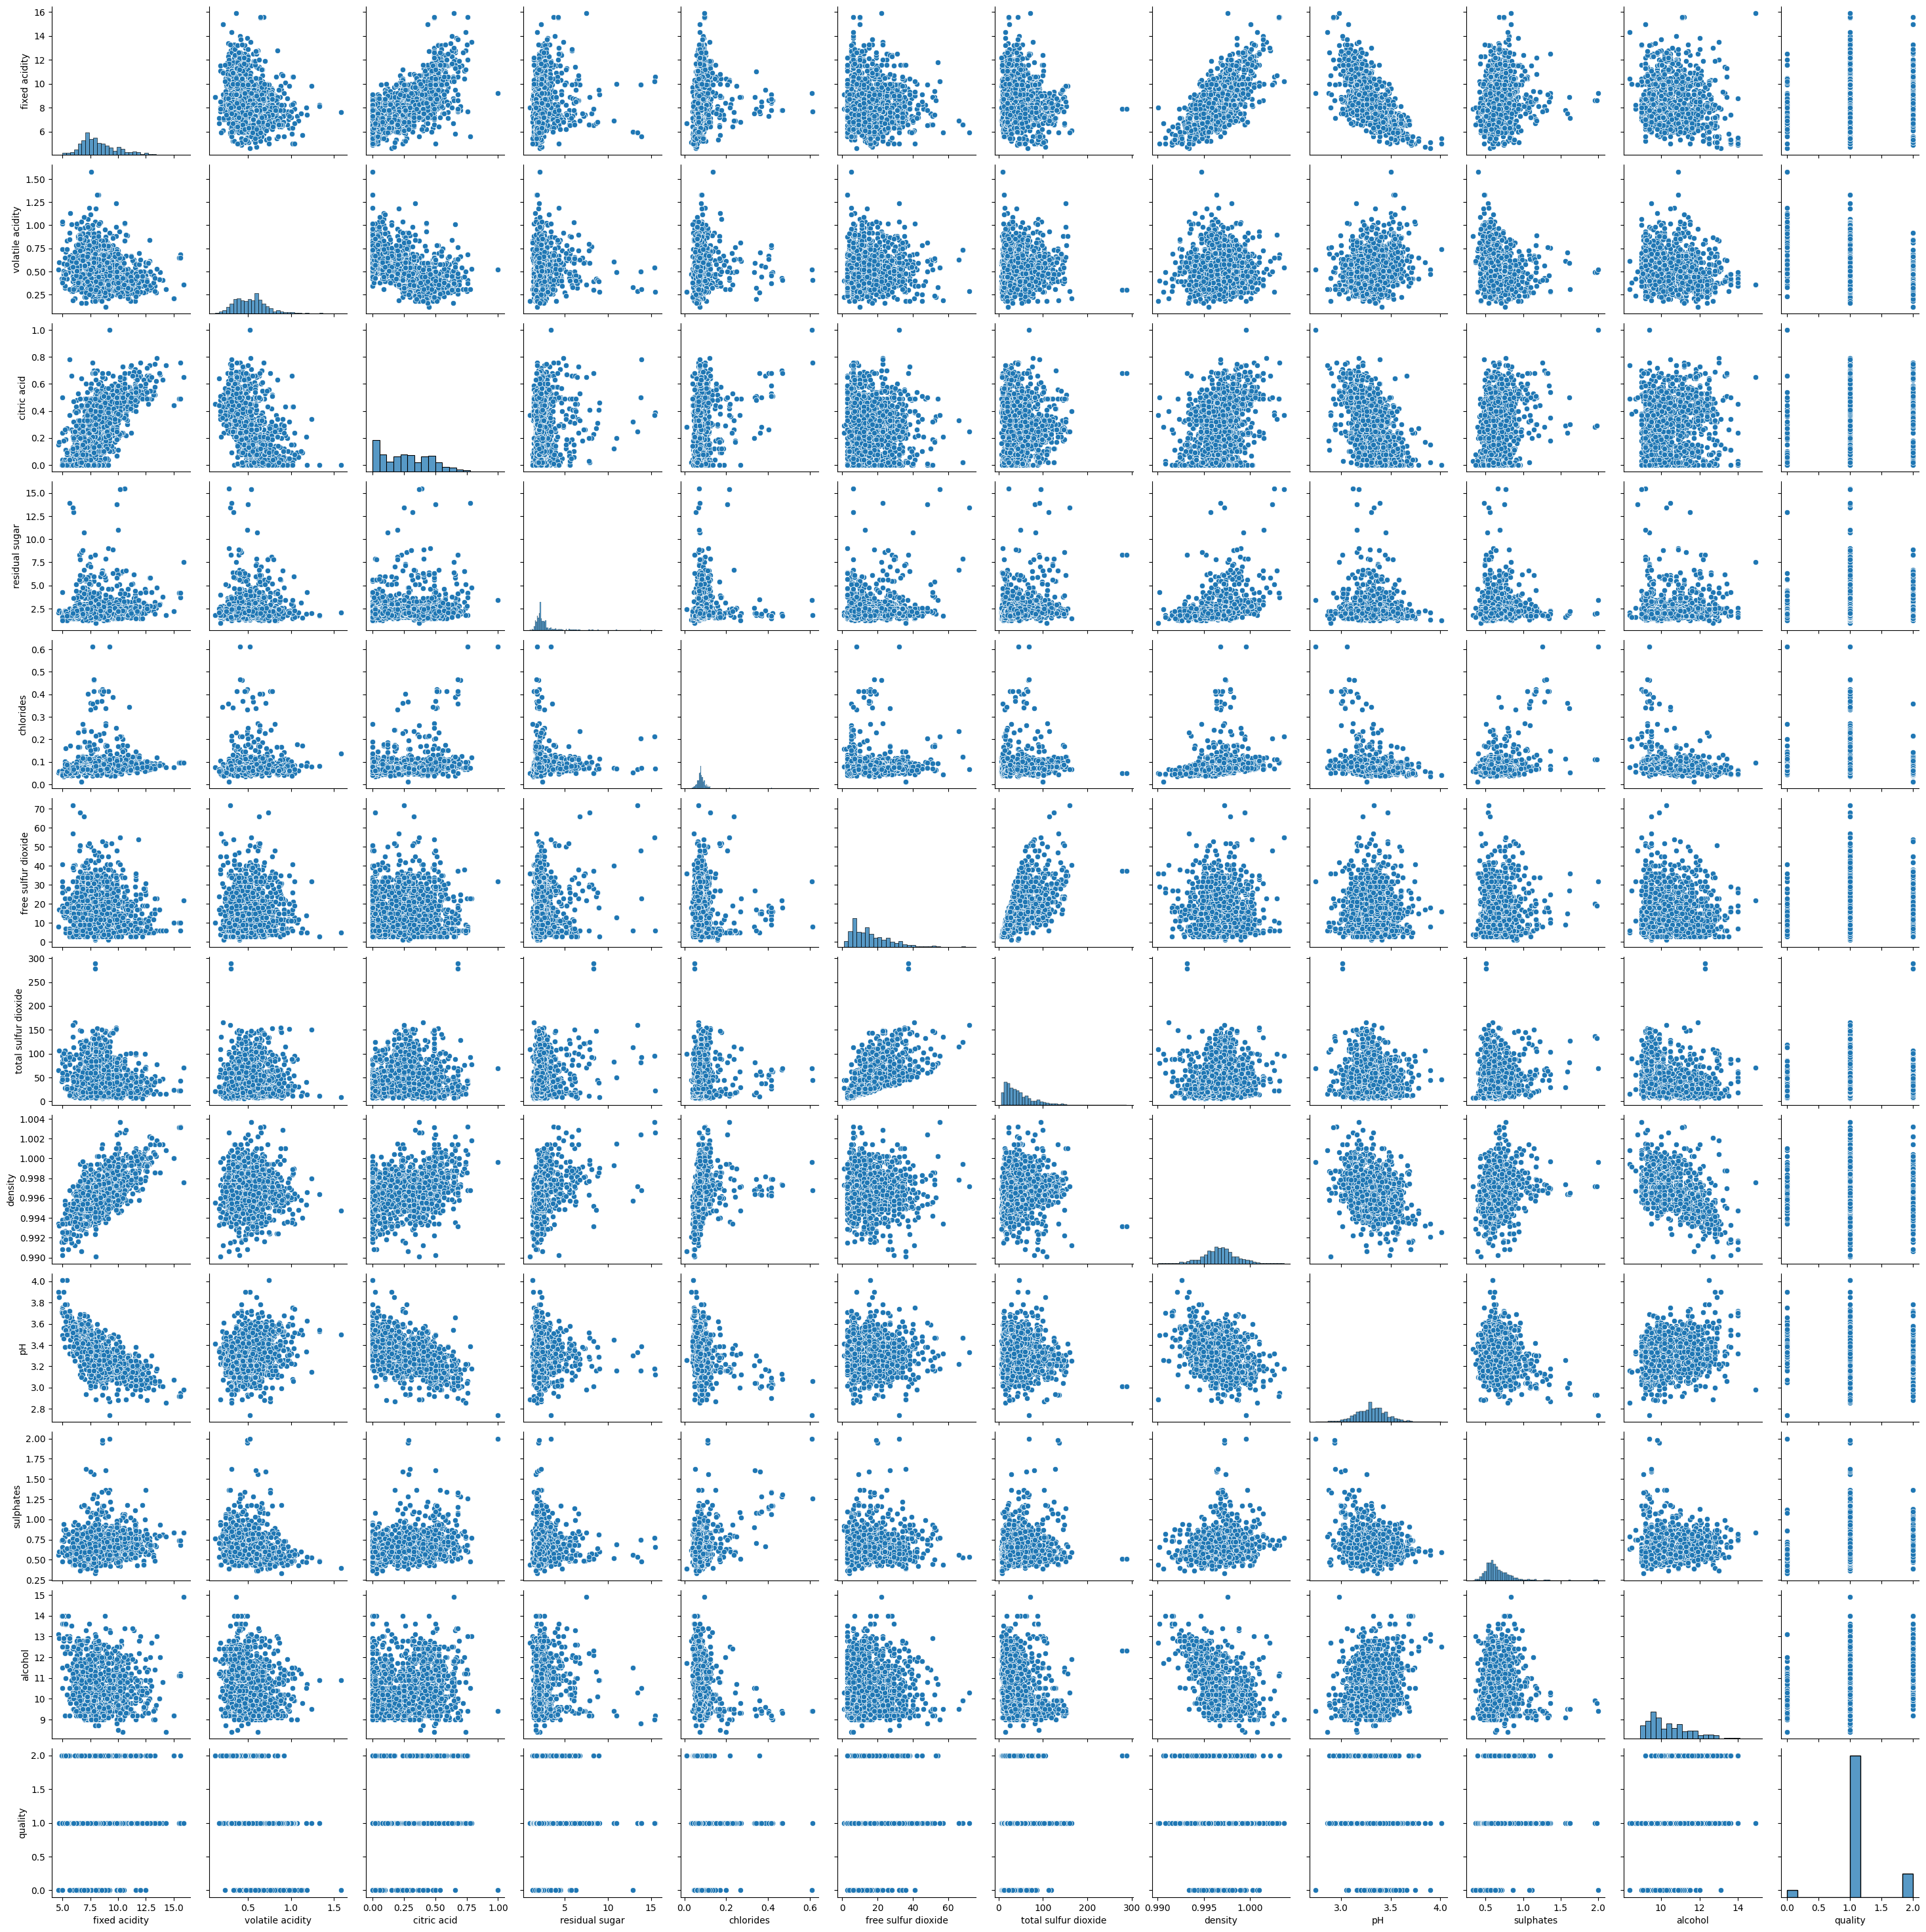

In [27]:
plt.figure(figsize = (12,6))
sns.pairplot(data)
plt.show()

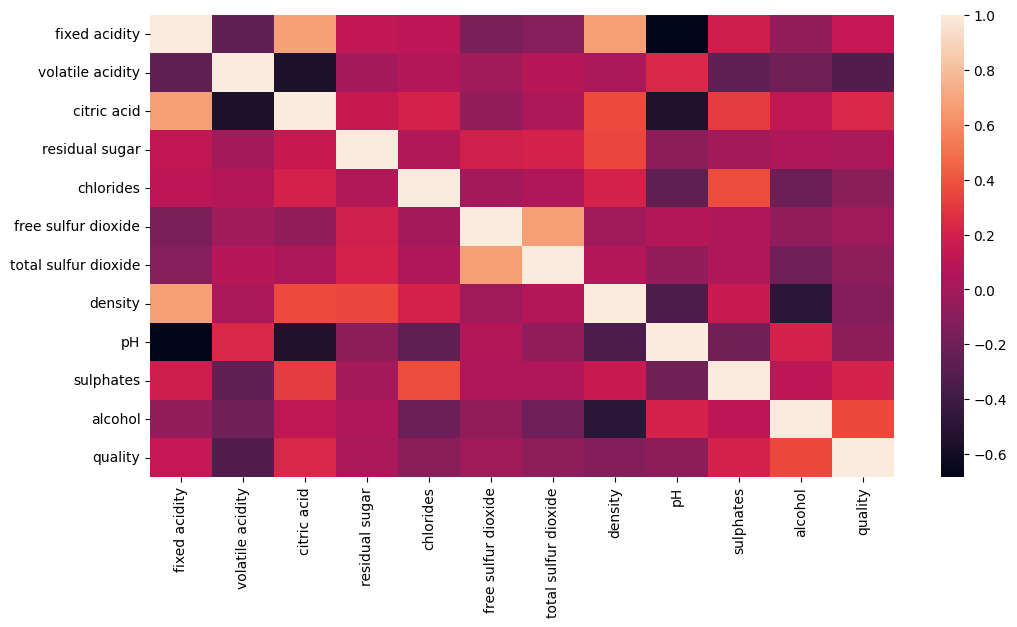

In [28]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr())
plt.show()


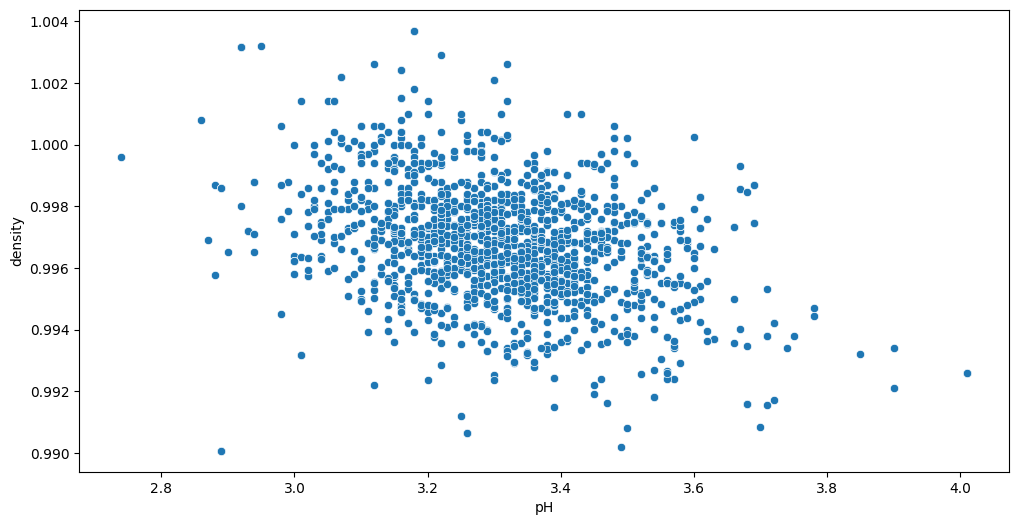

In [29]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='pH', y = 'density', data = data)
plt.show()

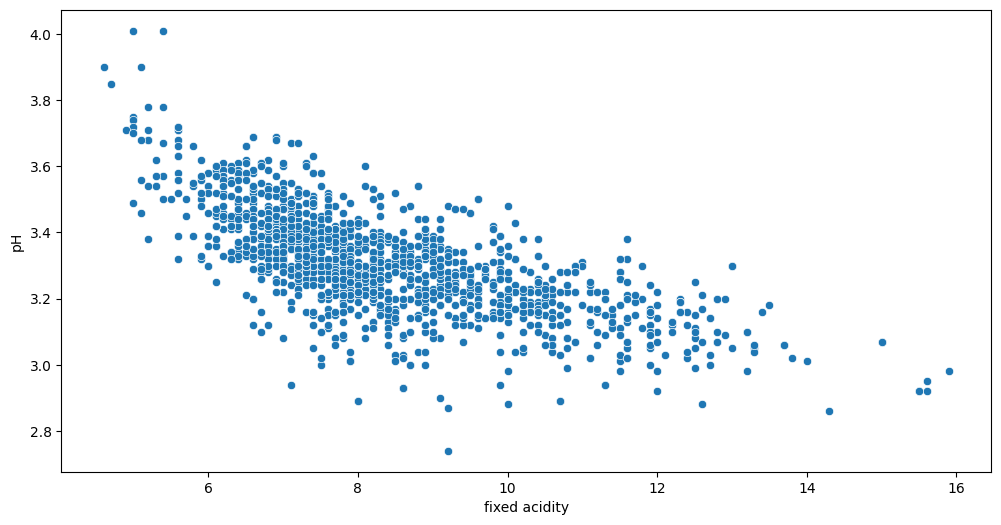

In [30]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='fixed acidity', y = 'pH', data = data)
plt.show()

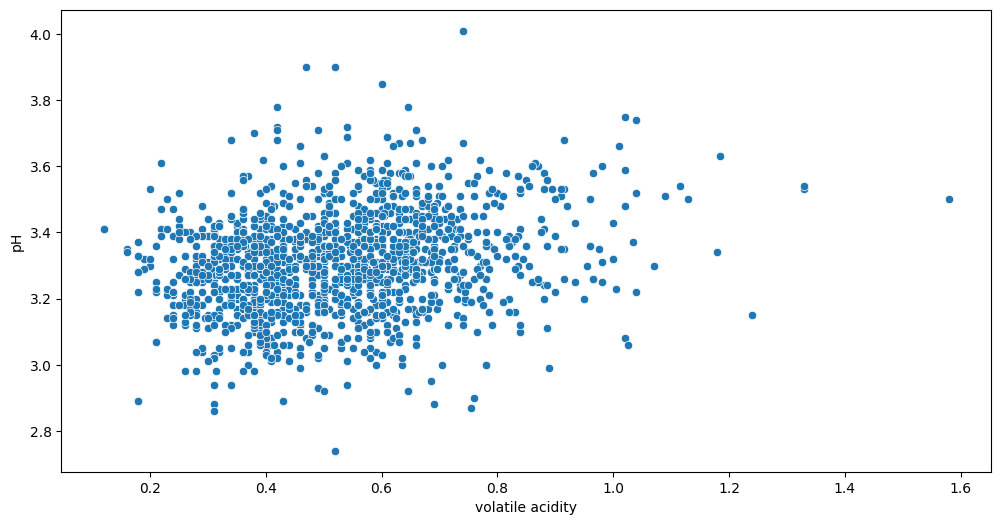

In [31]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='volatile acidity', y = 'pH', data = data)
plt.show()

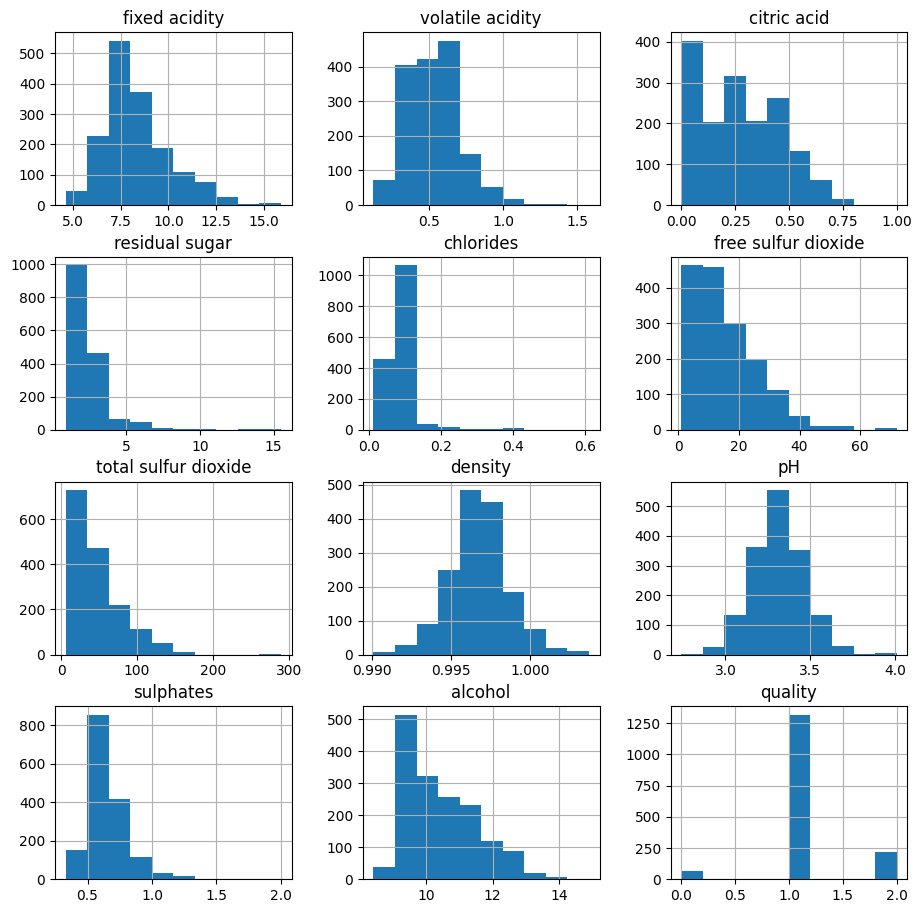

In [32]:
data.hist(figsize=(11, 11))
plt.show()

In [33]:

data['quality'].unique()

array([1, 2, 0])

In [34]:


data['quality'].value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

**Linear Regression Model**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
X=data.drop(['quality'], axis=1)
y=data['quality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 26)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
model.coef_


array([ 1.84329460e-02, -4.62000725e-01,  1.76420071e-02,  6.35145828e-03,
       -1.00133332e+00, -5.38649286e-04, -1.93748618e-04, -1.19277431e+01,
       -1.38148886e-01,  3.84439947e-01,  1.07000096e-01])

In [39]:

model.intercept_

12.250887105898576

In [40]:
cdf = pd.DataFrame(model.coef_, X.columns, columns = ['coef'])
cdf


,coef
fixed acidity,0.018433
volatile acidity,-0.462001
citric acid,0.017642
residual sugar,0.006351
chlorides,-1.001333
free sulfur dioxide,-0.000539
total sulfur dioxide,-0.000194
density,-11.927743
pH,-0.138149
sulphates,0.384440


In [41]:
predictions = model.predict(X_test)
predictions

array([1.14201498, 1.24654766, 0.92105229, 0.70582456, 0.87045629,
       1.27630812, 1.33979559, 1.07418721, 1.25295678, 0.91234221,
       0.9132498 , 1.19453465, 1.28541619, 0.84315456, 1.43803379,
       1.47223943, 1.43689063, 1.01122107, 0.7914708 , 0.76055307,
       1.10224057, 1.23355159, 0.94491132, 0.72685617, 1.08012254,
       0.76234533, 1.0107731 , 1.23939341, 0.87693956, 0.98779481,
       1.11371114, 1.24432745, 1.24088435, 1.31421807, 0.9085376 ,
       1.10999656, 1.47761511, 0.84476187, 0.83289533, 0.86459045,
       0.84558469, 1.22300995, 0.93110299, 1.25280258, 0.84491972,
       1.12870278, 1.333494  , 1.63711649, 0.86757754, 0.98341625,
       1.00508086, 0.96003544, 0.99456742, 0.90375001, 0.93102036,
       0.90061281, 1.46494776, 1.25387649, 1.01150359, 1.40669321,
       0.73757382, 1.3231717 , 1.23492293, 1.12131202, 0.90526786,
       1.02988872, 1.30665783, 1.0572288 , 1.01424381, 1.1409408 ,
       1.10020935, 0.95297287, 1.38556291, 0.81528396, 1.35998

**Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictiondt= dt.predict(X_test)
predictiondt

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,

In [43]:
accuracy_score(y_test, predictiondt)

0.8041666666666667

**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
predictionrf= rf.predict(X_test)
predictionrf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,

In [45]:
accuracy_score(y_test, predictionrf)

0.8770833333333333